In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('EURUSD-30.csv')
data.head()

,DateTime,Time,Open,MA20,CurClose,NextClose
0,2022.08.19 16:00:00,160,1.0049,1.0072,1.0050,1.0066
1,2022.08.19 16:30:00,1630,1.0050,1.0072,1.0066,1.0055
2,2022.08.19 17:00:00,170,1.0065,1.0070,1.0055,1.0054
3,2022.08.19 17:30:00,1730,1.0055,1.0068,1.0054,1.0047
4,2022.08.19 18:00:00,180,1.0054,1.0066,1.0047,1.0041


In [3]:
data.shape

(2000, 6)

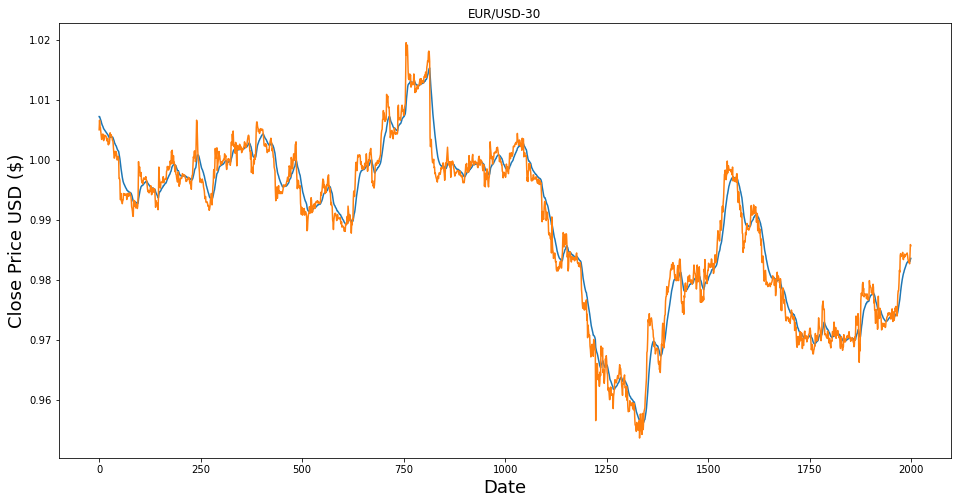

In [4]:
plt.figure(figsize=(16,8))
plt.title('EUR/USD-30')
#plt.plot(data.Open)
plt.plot(data.MA20)
plt.plot(data.CurClose)
#plt.plot(data.NextClose)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data_x = data.filter(['Open','MA20'], axis='columns')
data_y = data.filter(['CurClose'], axis='columns')

In [6]:
data_x

,Open,MA20
0,1.0049,1.0072
1,1.0050,1.0072
2,1.0065,1.0070
3,1.0055,1.0068
4,1.0054,1.0066
...,...,...
1995,0.9830,0.9831
1996,0.9831,0.9830
1997,0.9827,0.9831
1998,0.9841,0.9834


In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, random_state=False, shuffle=False, test_size=.3)
print("X_train: ", X_train.shape, ", y_train: ", y_train.shape, ", X_test: ", X_test.shape, ", y_test: ", y_test.shape)

X_train:  (1400, 2) , y_train:  (1400, 1) , X_test:  (600, 2) , y_test:  (600, 1)


In [37]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [54]:
X_test.iloc[0]

Open    0.9776
MA20    0.9737
Name: 1400, dtype: float64

In [39]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print("Model coef: ", model.coef_, " --- Model Intercept: ", model.intercept_)

Model coef:  [[0.95570766 0.04171853]]  --- Model Intercept:  [0.0025301]


In [40]:
model.score(X_test, y_test)

0.9788393819994097

In [41]:
X_test.iloc[0]

Open    0.9776
MA20    0.9737
Name: 1400, dtype: float64

In [43]:
y_test[0]

array([0.9781])

In [44]:
y_pred = model.predict(X_test)

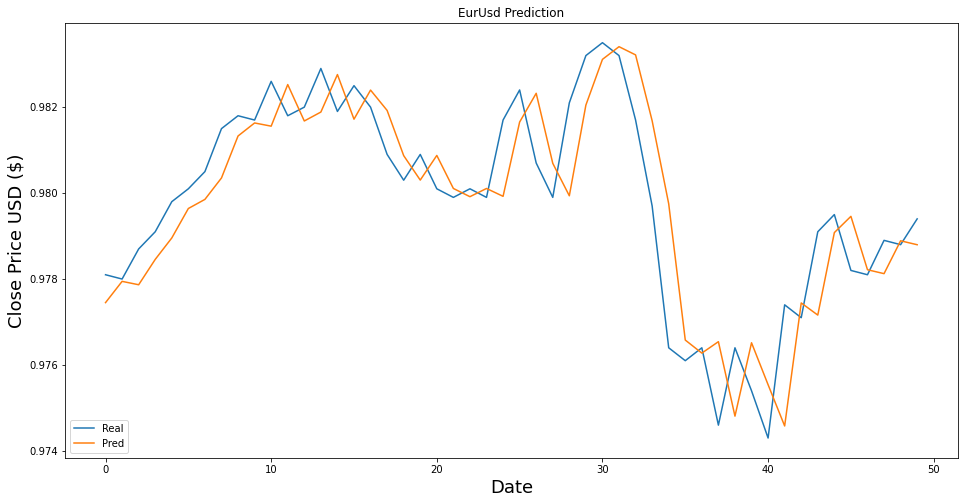

In [68]:
plt.figure(figsize=(16,8))
plt.title('EurUsd Prediction')
plt.plot(y_test[0:50])
plt.plot(y_pred[0:50])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(['Real', 'Pred'], loc='lower left')
plt.show()

In [23]:
print("Real: " + str(y_test.iloc[0]) + " , Pred: " + str(y_pred[0]))

Real: CurClose    0.9781
Name: 1400, dtype: float64 , Pred: [0.97745125]


In [74]:
y_curr = {'Open':[0.9862], 'MA20':[0.9843]}
y = pd.DataFrame(y_curr)
y

,Open,MA20
0,0.9862,0.9843


In [75]:
prediction = model.predict(y)
print('Current Close: ', round(prediction[0][0], 4))

Current Close:  0.9861
